<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

In [1]:
# install dependencies: 
!pip install pyyaml==5.1
!pip install Pillow==5.3.0
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
!gcc --version

  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: detectron2 0.3+cu101 has requirement Pillow>=7.1, but you'll have pillow 5.3.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 8.1.0
    Uninstalling Pillow-8.1.0:
      Successfully uninstalled Pillow-8.1.0


Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
  Using cached https://files.pythonhosted.org/packages/b6/c0/442d9d87e0da00bf856ef6dd4916f84a2d710b5f1a367d42d7f3c4e99a6c/Pillow-8.1.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0


gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [1]:
# Some basic setup:
import torch, torchvision
import torch
assert torch.__version__.startswith("1.7")

# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Image

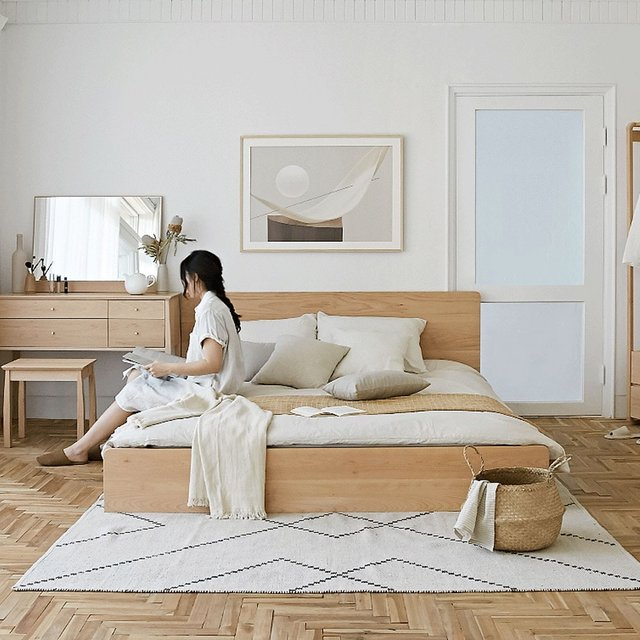

In [3]:
# !wget C:\Code\project\deep learning\datas\bed_55795.png -q -O input.jpg
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/bed_54564.png")
cv2_imshow(im)

# Object Detection

In [4]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


In [5]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0, 59, 75, 75, 58], device='cuda:0')
Boxes(tensor([[ 38.0373, 249.4327, 247.2323, 465.4586],
        [ 29.6804, 286.7626, 572.2327, 534.1513],
        [156.6927, 262.4166, 168.9392, 292.1446],
        [123.8042, 272.4042, 149.3442, 294.4478],
        [131.2823, 214.6453, 196.6833, 292.9135]], device='cuda:0'))


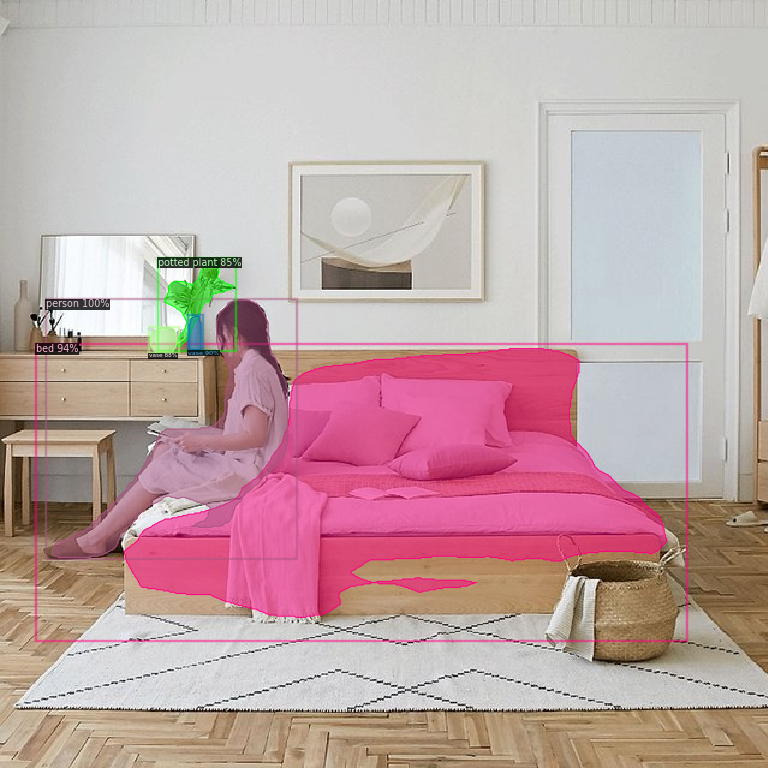

In [6]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Write object to image file

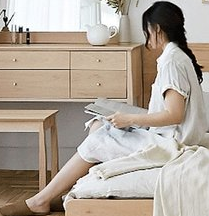

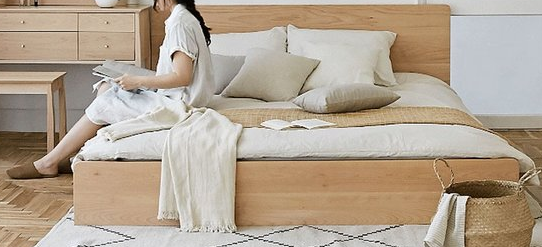

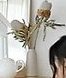

In [7]:
for cls, xy in zip(outputs["instances"].pred_classes, outputs["instances"].pred_boxes):
  xy = list(map(round, xy.tolist()))
  dst = im[xy[1]:xy[3], xy[0]:xy[2]].copy()
  cv2_imshow(dst)
  obj = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[cls]
  cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/datas/{}.png".format(obj), dst)

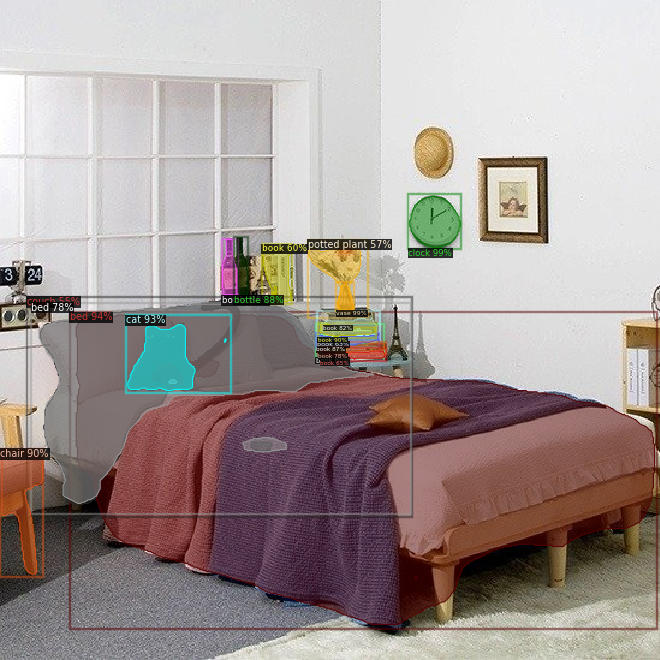

In [8]:
im2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/bed_136682.png")
outputs2 = predictor(im2)
v2 = Visualizer(im2[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out2 = v2.draw_instance_predictions(outputs2["instances"].to("cpu"))
cv2_imshow(out2.get_image()[:, :, ::-1])

# Comparing histograms

In [9]:
from __future__ import print_function
from __future__ import division
import cv2 as cv
import numpy as np
import pandas as pd

src_base = cv.imread('/content/drive/MyDrive/Colab Notebooks/datas/bed.png')
src_test1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/datas/bed_54581.png')
src_test2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/datas/bed_85276.png')

if src_base is None or src_test1 is None or src_test2 is None:
    print('Could not open or find the images!')
    exit(0)

hsv_base = cv.cvtColor(src_base, cv.COLOR_BGR2HSV)
hsv_test1 = cv.cvtColor(src_test1, cv.COLOR_BGR2HSV)
hsv_test2 = cv.cvtColor(src_test2, cv.COLOR_BGR2HSV)
hsv_half_down = hsv_base[hsv_base.shape[0]//2:,:]

h_bins = 50
s_bins = 60
histSize = [h_bins, s_bins]

# hue varies from 0 to 179, saturation from 0 to 255
h_ranges = [0, 180]
s_ranges = [0, 256]
ranges = h_ranges + s_ranges # concat lists

# Use the 0-th and 1-st channels
channels = [0, 1]
hist_base = cv.calcHist([hsv_base], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_half_down = cv.calcHist([hsv_half_down], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_half_down, hist_half_down, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_test1 = cv.calcHist([hsv_test1], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test1, hist_test1, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_test2 = cv.calcHist([hsv_test2], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test2, hist_test2, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

df = []

for compare_method in range(4):
    base_base = cv.compareHist(hist_base, hist_base, compare_method)
    base_half = cv.compareHist(hist_base, hist_half_down, compare_method)
    base_test1 = cv.compareHist(hist_base, hist_test1, compare_method)
    base_test2 = cv.compareHist(hist_base, hist_test2, compare_method)
    df.append({base_base, base_half, base_test1, base_test2})

pd.DataFrame(df, columns = ['Input-Input', 'Input-Half', 'Input-Test1', 'Input-Test2'], index = ['Correlation', 'Chi-square', 'Intersection', 'Bhattacharyya'])

,Input-Input,Input-Half,Input-Test1,Input-Test2
Correlation,0.887404,1.000000,0.314612,0.359966
Chi-square,0.000000,603.683317,4.217753,31.825348
Intersection,18.061100,3.426656,5.143728,23.057872
Bhattacharyya,0.000000,0.226739,0.488884,0.564270


In [10]:
!curl -L "https://app.roboflow.com/ds/cqo4jQYPiJ?key=tuEEpKvya1" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   887  100   887    0     0   1190      0 --:--:-- --:--:-- --:--:--  1189
100 40.0M  100 40.0M    0     0  30.6M      0  0:00:01  0:00:01 --:--:-- 30.6M
Archive:  roboflow.zip
 extracting: README.roboflow.txt     
   creating: test/
 extracting: test/_annotations.coco.json  
 extracting: test/floor_lamp_104526_png.rf.009e6160c57a9a36d079b17226dd4b0b.jpg  
 extracting: test/floor_lamp_117262_png.rf.0c8948b4cbb780e6e0a3c760dd486636.jpg  
 extracting: test/floor_lamp_118273_png.rf.8b9e1686c94929e94c683d3586239519.jpg  
 extracting: test/floor_lamp_118278_png.rf.867b373ac387d9b9ed90c90e591d858e.jpg  
 extracting: test/floor_lamp_118291_png.rf.215b675636b6c7ab7b9882f52eb7a514.jpg  
 extracting: test/floor_lamp_130619_png.rf.bb51acbbc415a21ba6acbdacf3048221.jpg  
 extracting: test/floor_lamp_140648_png.rf.820dd5af3361a77cbb9daa0cf9

In [10]:
# !unzip "/content/drive/MyDrive/Colab Notebooks/lamp/lamp.v6-test.coco.zip" -d "/content/drive/MyDrive/Colab Notebooks/lamp"

In [11]:
from detectron2.data.datasets import register_coco_instances
register_coco_instances("my_dataset_train", {}, "/content/train/_annotations.coco.json", "/content/train")
register_coco_instances("my_dataset_val", {}, "/content/valid/_annotations.coco.json", "/content/valid")
register_coco_instances("my_dataset_test", {}, "/content/test/_annotations.coco.json", "/content/test")

WARNING [02/06 08:47:16 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[02/06 08:47:16 d2.data.datasets.coco]: Loaded 2466 images in COCO format from /content/train/_annotations.coco.json


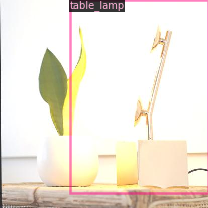

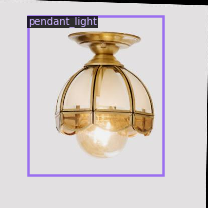

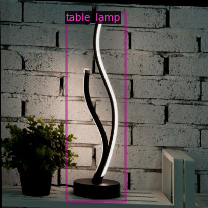

In [12]:
#visualize training data
my_dataset_train_metadata = MetadataCatalog.get("my_dataset_train")
dataset_dicts = DatasetCatalog.get("my_dataset_train")

import random
from detectron2.utils.visualizer import Visualizer

for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1], metadata=my_dataset_train_metadata, scale=0.5)
    vis = visualizer.draw_dataset_dict(d)
    cv2_imshow(vis.get_image()[:, :, ::-1])

In [13]:
#We are importing our own Trainer Module here to use the COCO validation evaluation during training. Otherwise no validation eval occurs.

from detectron2.engine import DefaultTrainer
from detectron2.evaluation import COCOEvaluator

class CocoTrainer(DefaultTrainer):

  @classmethod
  def build_evaluator(cls, cfg, dataset_name, output_folder=None):

    if output_folder is None:
        os.makedirs("coco_eval", exist_ok=True)
        output_folder = "coco_eval"

    return COCOEvaluator(dataset_name, cfg, False, output_folder)

In [14]:
#from .detectron2.tools.train_net import Trainer
#from detectron2.engine import DefaultTrainer
# select from modelzoo here: https://github.com/facebookresearch/detectron2/blob/master/MODEL_ZOO.md#coco-object-detection-baselines

from detectron2.config import get_cfg
#from detectron2.evaluation.coco_evaluation import COCOEvaluator
import os

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("my_dataset_train",)
cfg.DATASETS.TEST = ("my_dataset_val",)

cfg.DATALOADER.NUM_WORKERS = 4
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 4
cfg.SOLVER.BASE_LR = 0.001


cfg.SOLVER.WARMUP_ITERS = 1000
cfg.SOLVER.MAX_ITER = 2000 #adjust up if val mAP is still rising, adjust down if overfit
cfg.SOLVER.STEPS = (1000, 1500)
cfg.SOLVER.GAMMA = 0.05




cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 64
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 4 #your number of classes + 1

cfg.TEST.EVAL_PERIOD = 500


os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = CocoTrainer(cfg)
trainer.resume_or_load(resume=False)
trainer.train()

[02/06 08:47:35 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_68b088.pkl: 421MB [00:06, 69.1MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (5, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (5,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (16, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (16,) in the model! You might want to double check if this is expected.


[02/06 08:47:44 d2.engine.train_loop]: Starting training from iteration 0
[02/06 08:48:23 d2.utils.events]:  eta: 0:48:55  iter: 19  total_loss: 2.614  loss_cls: 1.718  loss_box_reg: 0.8628  loss_rpn_cls: 0.02539  loss_rpn_loc: 0.01036  time: 1.9684  data_time: 0.0294  lr: 1.9981e-05  max_mem: 7395M
[02/06 08:49:02 d2.utils.events]:  eta: 0:48:03  iter: 39  total_loss: 2.154  loss_cls: 1.329  loss_box_reg: 0.7998  loss_rpn_cls: 0.02536  loss_rpn_loc: 0.009429  time: 1.9717  data_time: 0.0143  lr: 3.9961e-05  max_mem: 7395M
[02/06 08:49:43 d2.utils.events]:  eta: 0:48:12  iter: 59  total_loss: 1.664  loss_cls: 0.8491  loss_box_reg: 0.7969  loss_rpn_cls: 0.01999  loss_rpn_loc: 0.008677  time: 1.9964  data_time: 0.0129  lr: 5.9941e-05  max_mem: 7395M
[02/06 08:50:23 d2.utils.events]:  eta: 0:47:31  iter: 79  total_loss: 1.56  loss_cls: 0.6652  loss_box_reg: 0.8561  loss_rpn_cls: 0.01316  loss_rpn_loc: 0.007288  time: 2.0008  data_time: 0.0132  lr: 7.9921e-05  max_mem: 7395M
[02/06 08:51:0

In [ ]:
# Look at training curves in tensorboard:
%load_ext tensorboard
%tensorboard --logdir output

In [16]:
#test evaluation
from detectron2.data import DatasetCatalog, MetadataCatalog, build_detection_test_loader
from detectron2.evaluation import COCOEvaluator, inference_on_dataset

cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.85
predictor = DefaultPredictor(cfg)
evaluator = COCOEvaluator("my_dataset_test", cfg, False, output_dir="./output/")
val_loader = build_detection_test_loader(cfg, "my_dataset_test")
inference_on_dataset(trainer.model, val_loader, evaluator)

WARNING [02/06 09:51:36 d2.evaluation.coco_evaluation]: COCO Evaluator instantiated using config, this is deprecated behavior. Please pass tasks in directly
WARNING [02/06 09:51:36 d2.data.datasets.coco]: 
Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.

[02/06 09:51:36 d2.data.datasets.coco]: Loaded 118 images in COCO format from /content/test/_annotations.coco.json
[02/06 09:51:36 d2.data.build]: Distribution of instances among all 4 categories:
|  category  | #instances   |   category    | #instances   |  category  | #instances   |
|:----------:|:-------------|:-------------:|:-------------|:----------:|:-------------|
| furniture  | 0            | pendant_light | 41           | stand_lamp | 51           |
| table_lamp | 40           |               |              |            |              |
|   total    | 132          |               |              |            |              |
[02/06 09:51:36 d2.data.dataset_mapper]: [DatasetMapper] Augmen

OrderedDict([('bbox',
              {'AP': 64.34747209332238,
               'AP-furniture': nan,
               'AP-pendant_light': 56.60011494262092,
               'AP-stand_lamp': 70.50945179628327,
               'AP-table_lamp': 65.93284954106294,
               'AP50': 94.10422969695625,
               'AP75': 75.37085513371093,
               'APl': 64.7758375818132,
               'APm': 53.16831683168317,
               'APs': nan})])

In [17]:
%ls ./output/

coco_instances_results.json                         instances_predictions.pth
events.out.tfevents.1612599955.73bdad985f80.183.0   last_checkpoint
events.out.tfevents.1612600698.73bdad985f80.183.1   metrics.json
events.out.tfevents.1612600782.73bdad985f80.183.2   model_final.pth
events.out.tfevents.1612601257.73bdad985f80.1032.0


In [18]:
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
cfg.DATASETS.TEST = ("my_dataset_test", )
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7   # set the testing threshold for this model
predictor = DefaultPredictor(cfg)
test_metadata = MetadataCatalog.get("my_dataset_test")

In [19]:
from detectron2.utils.visualizer import ColorMode
import glob

for imageName in glob.glob('/content/test/*jpg'):
  im = cv2.imread(imageName)
  outputs = predictor(im)
  v = Visualizer(im[:, :, ::-1],
                metadata=test_metadata, 
                scale=0.8
                 )
  out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
  cv2_imshow(out.get_image()[:, :, ::-1])


Output hidden; open in https://colab.research.google.com to view.